In [6]:
using MAT;
using CuArrays;
using Plots;
include("nnmf.jl");

In [11]:
filename = "data/tetris_piano_poly_V.mat";

comp_list = [16,32,64,128,192,253];
iter_list = [32,64,128,256,512,1024];

compile_time = @elapsed nnmf(filename,1,1);
elapsed_time = zeros(length(comp_list),length(iter_list));

figure_list = Array{Any}(undef,length(comp_list),length(iter_list))
for i_comp = 1:length(comp_list), i_iter = 1:length(iter_list)
    num_components = comp_list[i_comp]; 
    num_iterations = iter_list[i_iter];
    elapsed_time[i_comp,i_iter] = @elapsed W_i,H_i = nnmf(filename,num_components,num_iterations);
    
    # make a figure of the approximate matrix and save as png file
    fig_file = string("figures/",splitdir(filename)[2][1:end-4],"_",num_components,"comp","_",num_iterations,"iter");
    fig = heatmap(W_i[:,:,1]*H_i[:,:,1]);
    title!(fig, fig_file);
    png(fig, fig_file);
    print(i_comp,i_iter,"\n")
end

11
12
13
14
15
16
21
22
23
24
25
26
31
32
33
34
35
36
41
42
43
44
45
46
51
52
53
54
55
56
61
62
63
64
65
66


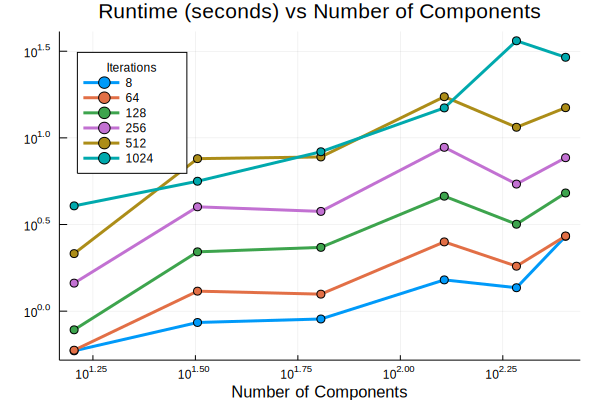

In [14]:
fig = plot(comp_list, elapsed_time, legend=:topleft, markershape=:circle,xaxis=:log, yaxis=:log, label=["8","64","128","256","512","1024"],lw=3,legend_title="Iterations")
xlabel!(fig, "Number of Components")
title!("Runtime (seconds) vs Number of Components")

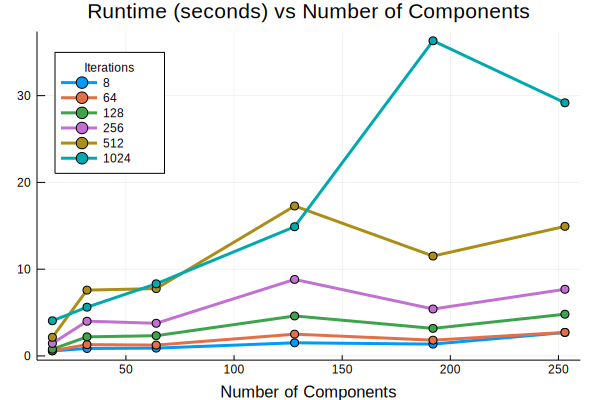

In [15]:
fig = plot(comp_list, elapsed_time, legend=:topleft, markershape=:circle, label=["8","64","128","256","512","1024"],lw=3,legend_title="Iterations")
xlabel!(fig, "Number of Components")
title!("Runtime (seconds) vs Number of Components")